## Python version

In [1]:
from platform import python_version
print(python_version())

3.6.5


In [1]:
!pip install -q tensorflow==2.0.0-beta1

tensorflow-serving-api 1.14.0 has requirement tensorflow~=1.14.0, but you'll have tensorflow 2.0.0b1 which is incompatible.
You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Import Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import preprocessing
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential
import numpy as np

## CNN (Convolutional Neural Network) configuration

In [3]:
classifier = Sequential()

# Convolution - extracting appropriate features from the input image.
# Non-Linearity (RELU) - replacing all negative pixel values in feature map by zero.

classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3),
               activation='relu'))

# Pooling: reduces dimensionality of the feature maps but keeps the most important information.

classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a second convolutional layer and flattening in order to arrange 3D volumes into a 1D vector.

classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())

# Fully connected layers: ensures connections to all activations in the previous layer.

classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

## Classifier Training

In [4]:
classifier.compile(optimizer='adam', loss='binary_crossentropy',
                   metrics=['accuracy'])
from keras.preprocessing.image import ImageDataGenerator
train_imagedata = ImageDataGenerator(rescale=1. / 255, shear_range=0.2,
        zoom_range=0.2, horizontal_flip=True)
test_imagedata = ImageDataGenerator(rescale=1. / 255)
training_set = \
    train_imagedata.flow_from_directory('data/training_set'
        , target_size=(64, 64), batch_size=32, class_mode='binary')
val_set = \
    test_imagedata.flow_from_directory('data/val_set'
        , target_size=(64, 64), batch_size=32, class_mode='binary')
history=classifier.fit_generator(training_set, steps_per_epoch=30, epochs=30,
                         validation_data=val_set,
                         validation_steps=30)

Using TensorFlow backend.


Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/30


W1007 11:24:37.864387 140285543745344 deprecation.py:323] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


30/30 [==============================] - 15s 492ms/step - loss: 0.5158 - accuracy: 0.7469 - val_loss: 1.0469 - val_accuracy: 0.6750
Epoch 2/30
30/30 [==============================] - 13s 448ms/step - loss: 0.2550 - accuracy: 0.9042 - val_loss: 0.5266 - val_accuracy: 0.7750
Epoch 3/30
30/30 [==============================] - 13s 445ms/step - loss: 0.1942 - accuracy: 0.9177 - val_loss: 0.3112 - val_accuracy: 0.8750
Epoch 4/30
30/30 [==============================] - 13s 437ms/step - loss: 0.1377 - accuracy: 0.9490 - val_loss: 0.4389 - val_accuracy: 0.8250
Epoch 5/30
30/30 [==============================] - 13s 439ms/step - loss: 0.0792 - accuracy: 0.9781 - val_loss: 0.6742 - val_accuracy: 0.8000
Epoch 6/30
30/30 [==============================] - 13s 433ms/step - loss: 0.0623 - accuracy: 0.9802 - val_loss: 0.3522 - val_accuracy: 0.9000
Epoch 7/30
30/30 [==============================] - 13s 441ms/step - loss: 0.0740 - accuracy: 0.9719 - val_loss: 0.5362 - val_accuracy: 0.8750
Epoch 8/30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


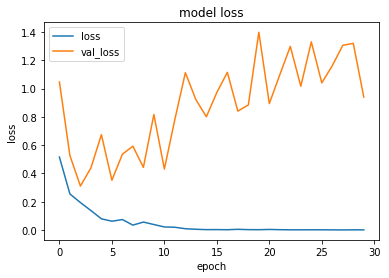

In [6]:
# Plot training and validation loss/accuracy
import matplotlib.pyplot as plt
print(history.history.keys())
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

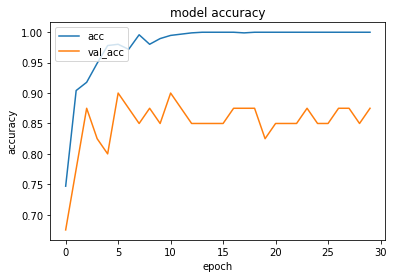

In [7]:
# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

## Setting up a data augmentation configuration via ImageDataGenerator

In [8]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [9]:
import os, shutil
train_cars_dir = 'data/training_set/cars'

In [10]:
fnames = [os.path.join(train_cars_dir, fname) for
         fname in os.listdir(train_cars_dir)]

In [11]:
fnames

['data/training_set/cars/classic-car-362176__340.jpg',
 'data/training_set/cars/car-1506922__340.jpg',
 'data/training_set/cars/car-3647352__340.jpg',
 'data/training_set/cars/car-1245706__340.jpg',
 'data/training_set/cars/bmw-3727172__340.jpg',
 'data/training_set/cars/automotive-1846910__340.jpg',
 'data/training_set/cars/car-3359874__340.jpg',
 'data/training_set/cars/blue-2118528__340.jpg',
 'data/training_set/cars/car-1283947__340.jpg',
 'data/training_set/cars/aston-2119120__340.jpg',
 'data/training_set/cars/auto-1515462__340.jpg',
 'data/training_set/cars/auto-2179220__340.jpg',
 'data/training_set/cars/auto-383897__340.jpg',
 'data/training_set/cars/car-1081742__340.jpg',
 'data/training_set/cars/car-604019__340.jpg',
 'data/training_set/cars/automobile-1850862__340.jpg',
 'data/training_set/cars/buildings-1851246__340.jpg',
 'data/training_set/cars/bmw-918408__340.jpg',
 'data/training_set/cars/buick-1400243__340.jpg',
 'data/training_set/cars/car-1245780__340.jpg',
 'data/t

In [12]:
img_path = fnames[3]

In [13]:
img = image.load_img(img_path, target_size=(64, 64))

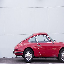

In [14]:
img

In [15]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
x

array([[[[203., 206., 221.],
         [208., 212., 224.],
         [212., 216., 227.],
         ...,
         [220., 223., 232.],
         [218., 221., 230.],
         [215., 217., 229.]],

        [[205., 208., 223.],
         [210., 214., 226.],
         [215., 219., 230.],
         ...,
         [220., 223., 232.],
         [219., 222., 231.],
         [216., 218., 230.]],

        [[208., 212., 224.],
         [213., 217., 228.],
         [216., 220., 231.],
         ...,
         [219., 222., 231.],
         [219., 222., 231.],
         [216., 218., 230.]],

        ...,

        [[122., 111., 128.],
         [132., 121., 138.],
         [136., 128., 143.],
         ...,
         [ 31.,  29.,  34.],
         [ 44.,  41.,  48.],
         [ 46.,  43.,  54.]],

        [[135., 124., 141.],
         [134., 123., 140.],
         [136., 125., 141.],
         ...,
         [ 31.,  26.,  30.],
         [ 39.,  37.,  40.],
         [ 26.,  21.,  27.]],

        [[204., 200., 215.],
       

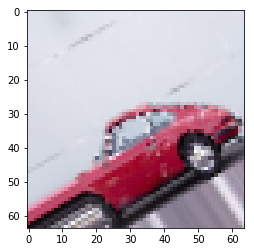

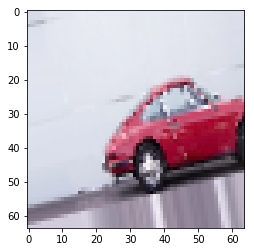

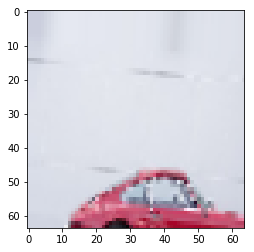

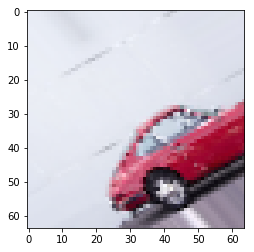

In [16]:
# Remixing existing information

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

### Trainable attribute set to False in order to freeze the convolutional base - this is done to prevent weights from updating during training

In [17]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(64,64,3))

conv_base.trainable=False

58892288/58889256 [==============================] - 1s 0us/step


In [18]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [19]:
model = tf.keras.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [21]:
train_dir = 'data/training_set'
validation_dir = 'data/val_set'

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [24]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=30,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=30)

Epoch 1/30
30/30 [==============================] - 127s 4s/step - loss: 0.4694 - acc: 0.7781 - val_loss: 0.4892 - val_acc: 0.7500
Epoch 2/30
30/30 [==============================] - 51s 2s/step - loss: 0.3281 - acc: 0.8719 - val_loss: 0.4667 - val_acc: 0.8000
Epoch 3/30
30/30 [==============================] - 213s 7s/step - loss: 0.2677 - acc: 0.8990 - val_loss: 0.4528 - val_acc: 0.8250
Epoch 4/30
30/30 [==============================] - 67s 2s/step - loss: 0.2401 - acc: 0.9062 - val_loss: 0.4275 - val_acc: 0.8000
Epoch 5/30
30/30 [==============================] - 187s 6s/step - loss: 0.2332 - acc: 0.9156 - val_loss: 0.4018 - val_acc: 0.8000
Epoch 6/30
30/30 [==============================] - 105s 4s/step - loss: 0.2034 - acc: 0.9219 - val_loss: 0.3697 - val_acc: 0.8000
Epoch 7/30
30/30 [==============================] - 151s 5s/step - loss: 0.1969 - acc: 0.9219 - val_loss: 0.3576 - val_acc: 0.8250
Epoch 8/30
30/30 [==============================] - 140s 5s/step - loss: 0.1914 - acc

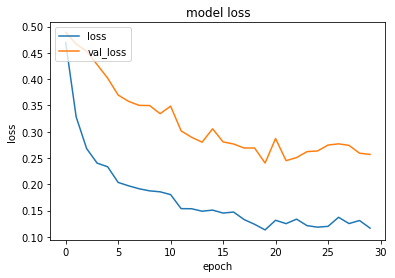

In [25]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

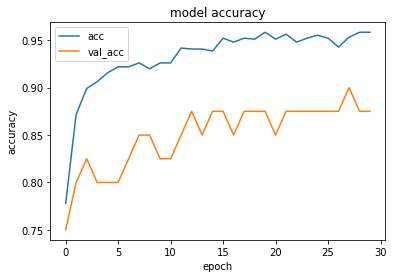

In [26]:
# Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

## Generate predictions

In [31]:
# car = 0, plane = 1

# image = plane

test_image = \
    image.load_img('data/test/photo-1430402393301-f3b159a7a65a.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[0.]], dtype=float32)

In [32]:
# car = 0, plane = 1

# image = car

test_image = \
    image.load_img('data/test/photo-1542362567-b07e54358753.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[0.]], dtype=float32)

In [33]:
# car = 0, plane = 1

# image = car

test_image = \
    image.load_img('data/test/photo-1541443131876-44b03de101c5.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[0.]], dtype=float32)

In [34]:
# car = 0, plane = 1

# image = car

test_image = \
    image.load_img('data/test/photo-1532974297617-c0f05fe48bff.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[0.]], dtype=float32)

In [35]:
# car = 0, plane = 1

# image = car

test_image = \
    image.load_img('data/test/photo-1520340356584-f9917d1eea6f.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[0.]], dtype=float32)

In [36]:
# car = 0, plane = 1

# image = car

test_image = \
    image.load_img('data/test/photo-1519641471654-76ce0107ad1b.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[0.]], dtype=float32)

In [37]:
# car = 0, plane = 1

# image = plane

test_image = \
    image.load_img('data/test/photo-1512289984044-071903207f5e.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[1.]], dtype=float32)

In [38]:
# car = 0, plane = 1

# image = car

test_image = \
    image.load_img('data/test/photo-1511919884226-fd3cad34687c.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[0.]], dtype=float32)

In [39]:
# car = 0, plane = 1

# image = car

test_image = \
    image.load_img('data/test/photo-1502877338535-766e1452684a.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[0.]], dtype=float32)

In [40]:
# car = 0, plane = 1

# image = plane

test_image = \
    image.load_img('data/test/photo-1498423281417-af8aff4579dc.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[1.]], dtype=float32)

In [41]:
# car = 0, plane = 1

# image = car

test_image = \
    image.load_img('data/test/photo-1494905998402-395d579af36f.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[0.]], dtype=float32)

In [42]:
# car = 0, plane = 1

# image = car

test_image = \
    image.load_img('data/test/photo-1489824904134-891ab64532f1.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[0.]], dtype=float32)

In [43]:
# car = 0, plane = 1

# image = plane

test_image = \
    image.load_img('data/test/photo-1483375801503-374c5f660610.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[1.]], dtype=float32)

In [44]:
# car = 0, plane = 1

# image = plane

test_image = \
    image.load_img('data/test/photo-1475088092121-b7d3cd6e1482.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[1.]], dtype=float32)

In [45]:
# car = 0, plane = 1

# image = plane

test_image = \
    image.load_img('data/test/photo-1473862170180-84427c485aca.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[1.]], dtype=float32)